In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
plt.style.use('~/repositories/go_figure/ClassicScience.mplstyle')

import matplotlib
matplotlib.rcParams.update({"text.usetex": False,
                            "font.size": 16})

def get_S8(theta):
    return np.array([theta[:, 0], theta[:, 1]*np.sqrt(theta[:, 0]/0.3)]).T

def get_sigma8(theta):
    return np.array([theta[:, 0], theta[:, 1]/np.sqrt(theta[:, 0]/0.3)]).T

In [9]:
cd /Users/lucas/repositories/epe_hybrid/results

/Users/lucas/repositories/epe_hybrid/results


/Users/lucas/venvs/ltu-ili/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [10]:
pwd

'/Users/lucas/repositories/epe_hybrid/results'

In [24]:
pal = sns.cubehelix_palette(rot=-.4, reverse=False, n_colors=10, gamma=2.0, dark=0.33)
print(pal.as_hex())
flatui = pal.as_hex()[::-1]

my_cmap = ListedColormap(sns.color_palette(flatui).as_hex())

sns.cubehelix_palette(rot=-0.45, reverse=False, n_colors=10, gamma=2.0, dark=0.44)

['#9ccba3', '#7bb78d', '#60a37d', '#498d6f', '#377863', '#296357', '#1f4f4c', '#183e41', '#122e35', '#0e2029']


[[0.637398843166092, 0.7900795344035182, 0.6072807505473046],
 [0.530621201830911, 0.7268298277213829, 0.5297612000033831],
 [0.4413449069842116, 0.6683469870700085, 0.473312398005135],
 [0.3551410444628584, 0.6037442092154994, 0.4241132706585587],
 [0.2815217767880049, 0.5385125549039368, 0.3842299270239892],
 [0.22514980652494793, 0.4786733959923696, 0.35296804087069533],
 [0.17514800255032556, 0.41416462559420225, 0.32196941025896203],
 [0.13593469364573255, 0.3514789086514274, 0.29203369160049414],
 [0.10808590194237025, 0.29656862469891304, 0.26419564181621313],
 [0.08484538954478443, 0.24045823387180507, 0.23260322152361862]]

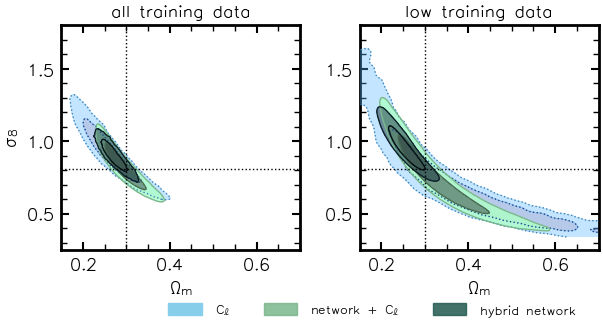

In [92]:
from chainconsumer.plotting import plot_contour, plot_truths
from chainconsumer import Chain, ChainConsumer, make_sample, Truth, PlotConfig, ChainConfig

from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

all_data = np.load("results_target_N128_epe_noise12_alltrainingdata_comp_nouts3_vmim_concat.npz")

low_data = np.load("results_target_N128_epe_noise12_lowtrainingdata_comp_nouts3_vmim_concat.npz")
#low_data = np.load("results_target_N128_epe_noise12_lowtrainingdata_comp_nouts3_vmim_concat_epe_n500.npz")


results_files = [all_data, low_data]
Nsides = [128, 128]

toplabels = [r"all training data", r"low training data"]

target_theta = np.array([0.3, 0.811])
param_labels = [r'$\Omega_m$', r'$\sigma_8$']




# fig,axs = plt.subplots(nrows=1, ncols=2, figsize=(7.058 / 1.33 , 3.41 / 1.33), 
#                      #  sharey=True, 
#                      #  sharex=True
#                       )

fig,axs = plt.subplots(nrows=1, ncols=2, figsize=(7.058 / 1.1, 3.41), sharey=False, sharex=False)


for i,result in enumerate(results_files):

    df = pd.DataFrame(result["chains_epe"], columns=param_labels)
    df_vmim = pd.DataFrame(result["chains_vmim"], columns=param_labels)
    df_moped = pd.DataFrame(result["chains_cls"], columns=param_labels)

    truth = Truth(location={param_labels[0]: target_theta[0], param_labels[1]: target_theta[1]},
                 line_style=':')
    plot_truths(axs[i], [truth], px=r'$\Omega_m$', py=r'$\sigma_8$')

    plot_contour(axs[i], Chain(samples = df_moped, 
                               name="MOPED$(C_\ell)$", 
                               shade_alpha=0.35,
                               linestyle=":",
                               smooth=2), px=param_labels[0], py=param_labels[1], )
    plot_contour(axs[i], Chain(samples = df_vmim, 
                               name="learned + $C_\ell$", 
                               color="#7bb78d",
                               shade_alpha=0.8,
                               linestyle="-",
                               smooth=2), px=param_labels[0], py=param_labels[1], )
    plot_contour(axs[i], Chain(samples = df, 
                               name="hybrid summaries", 
                               color='#0e2029',
                               smooth=2), px=param_labels[0], py=param_labels[1], )


    #if i == 0:
    #    axs[i].set_xlim(0.17, 0.7)
    #    axs[i].set_ylim(0.25, 1.3)
    #else:
    axs[i].set_xlim(0.15, 0.7)
    axs[i].set_ylim(0.25, 1.8)

    #if i == 2:
    #    axs[i].set_xlim(0.21, 0.4)
    #    axs[i].set_ylim(0.55, 1.1)
    
    axs[i].set_xlabel(param_labels[0], fontsize=16)
    if i == 0:
        axs[i].set_ylabel(param_labels[1], fontsize=16)

    #axs[i].set_title('L=%d'%(Lsides[i]), fontsize=16)
    axs[i].set_title(r'%s'%(toplabels[i]), fontsize=16)



patch1 = mpatches.Patch(color='skyblue', 
                        label='$C_\ell$')

patch2 = mpatches.Patch(color='#7bb78d', label=r'network + $C_\ell$', alpha=0.86)
patch3 = mpatches.Patch(color='#245b53', label=r'hybrid network', alpha=0.86)
fig.legend(handles=[patch1, patch2, patch3],bbox_to_anchor=(0.95, 0.1), fontsize=12, ncol=3, frameon=False,)


plt.subplots_adjust(wspace=0.3, hspace=0.15, bottom=0.21)

plt.tight_layout()
plt.savefig("/Users/lucas/repositories/epe_hybrid/plots/wl_training_ablation.pdf", dpi=500)

In [103]:
low_data.keys()

KeysView(NpzFile 'results_target_N128_epe_noise12_lowtrainingdata_comp_nouts3_vmim_concat_epe_n500.npz' with keys: chains_epe_n500, chains_vmim, chains_epe, chains_cls)

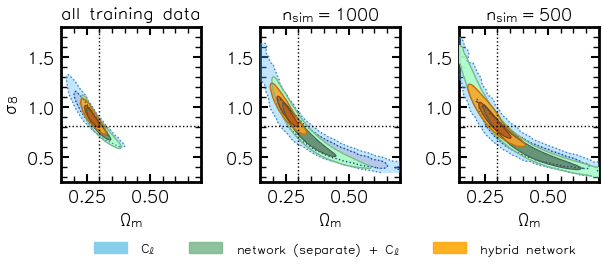

In [188]:
from chainconsumer.plotting import plot_contour, plot_truths
from chainconsumer import Chain, ChainConsumer, make_sample, Truth, PlotConfig, ChainConfig

from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

all_data = np.load("results_target_N128_epe_noise12_alltrainingdata_comp_nouts3_vmim_concat.npz")

#low_data = np.load("results_target_N128_epe_noise12_lowtrainingdata_comp_nouts3_vmim_concat.npz")
low_data = np.load("results_target_N128_epe_noise12_lowtrainingdata_comp_nouts3_vmim_concat_epe_n500.npz")

low_data_all = np.load("results_target_N128_epe_noise12_lowtrainingdata_comp_nouts3_concat_epe_and_vmim_n500.npz")

results_files = [all_data, low_data, low_data_all]
Nsides = [128, 128]

toplabels = [r"all training data", r"$n_{\rm sim}=1000$", r"$n_{\rm sim}=500$"]

target_theta = np.array([0.3, 0.811])
param_labels = [r'$\Omega_m$', r'$\sigma_8$']




# fig,axs = plt.subplots(nrows=1, ncols=2, figsize=(7.058 / 1.33 , 3.41 / 1.33), 
#                      #  sharey=True, 
#                      #  sharex=True
#                       )

fig,axs = plt.subplots(nrows=1, ncols=3, figsize=(7.058 / 1.1, 3.41 / 1.25), sharey=False, sharex=False)


for i,result in enumerate(results_files):

    if i == 2:
        df = pd.DataFrame(result["chains_epe_n500"], columns=param_labels)
    else:
        df = pd.DataFrame(result["chains_epe"], columns=param_labels)
    df_vmim = pd.DataFrame(result["chains_vmim"], columns=param_labels)
    df_moped = pd.DataFrame(result["chains_cls"], columns=param_labels)

    truth = Truth(location={param_labels[0]: target_theta[0], param_labels[1]: target_theta[1]},
                 line_style=':')
    plot_truths(axs[i], [truth], px=r'$\Omega_m$', py=r'$\sigma_8$')

    plot_contour(axs[i], Chain(samples = df_moped, 
                               name="MOPED$(C_\ell)$", 
                               shade_alpha=0.35,
                               #color="violet",
                               #color='#7bb78d',
                               linestyle=":",
                               smooth=2), px=param_labels[0], py=param_labels[1], )
    plot_contour(axs[i], Chain(samples = df_vmim, 
                               name="learned + $C_\ell$", 
                               #color="purple",
                               #color="#E0B0FF",
                               color="#7bb78d",
                               shade_alpha=0.9,
                               linestyle="-",
                               smooth=2), px=param_labels[0], py=param_labels[1], )
    plot_contour(axs[i], Chain(samples = df, 
                               name="hybrid summaries", 
                               #color='#0e2029',
                               color="orange",
                               shade_alpha=0.86,
                               smooth=2), px=param_labels[0], py=param_labels[1], )


    #if i == 0:
    #    axs[i].set_xlim(0.17, 0.7)
    #    axs[i].set_ylim(0.25, 1.3)
    #else:
    axs[i].set_xlim(0.15, 0.7)
    axs[i].set_ylim(0.25, 1.8)

    #if i == 2:
    #    axs[i].set_xlim(0.21, 0.4)
    #    axs[i].set_ylim(0.55, 1.1)
    
    axs[i].set_xlabel(param_labels[0], fontsize=16)
    if i == 0:
        axs[i].set_ylabel(param_labels[1], fontsize=16)

    #axs[i].set_title('L=%d'%(Lsides[i]), fontsize=16)
    axs[i].set_title(r'%s'%(toplabels[i]), fontsize=16)



patch1 = mpatches.Patch(color='skyblue', 
                        label='$C_\ell$')

patch2 = mpatches.Patch(
                        #color="pink",
                        color='#7bb78d', 
                        label=r'network (separate) + $C_\ell$', 
                        alpha=0.86)
patch3 = mpatches.Patch(color="orange",
                        #color='#245b53', 
                        label=r'hybrid network', alpha=0.86)
fig.legend(handles=[patch1, patch2, patch3],bbox_to_anchor=(0.95, 0.1), fontsize=12, ncol=3, frameon=False,)


plt.subplots_adjust(wspace=0.3, hspace=0.15, bottom=0.21)

plt.tight_layout()
plt.savefig("/Users/lucas/repositories/epe_hybrid/plots/wl_training_ablation_drama.pdf", dpi=500)

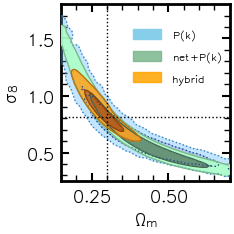

In [231]:
from chainconsumer.plotting import plot_contour, plot_truths
from chainconsumer import Chain, ChainConsumer, make_sample, Truth, PlotConfig, ChainConfig

from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

all_data = np.load("results_target_N128_epe_noise12_alltrainingdata_comp_nouts3_vmim_concat.npz")

#low_data = np.load("results_target_N128_epe_noise12_lowtrainingdata_comp_nouts3_vmim_concat.npz")
low_data = np.load("results_target_N128_epe_noise12_lowtrainingdata_comp_nouts3_vmim_concat_epe_n500.npz")

low_data_all = np.load("results_target_N128_epe_noise12_lowtrainingdata_comp_nouts3_concat_epe_and_vmim_n500.npz")

results_files = [low_data_all]
Nsides = [128, 128]

toplabels = [r"$n_{\rm sim}=500$"]

target_theta = np.array([0.3, 0.811])
param_labels = [r'$\Omega_m$', r'$\sigma_8$']




# fig,axs = plt.subplots(nrows=1, ncols=2, figsize=(7.058 / 1.33 , 3.41 / 1.33), 
#                      #  sharey=True, 
#                      #  sharex=True
#                       )

fig,axs = plt.subplots(nrows=1, ncols=1, figsize=(3.41 / 1.25, 3.41 / 1.25), sharey=False, sharex=False)


for i,result in enumerate(results_files):

    if len(results_files) < 2:
        axs = [axs]

    if i == 2:
        df = pd.DataFrame(result["chains_epe_n500"], columns=param_labels)
    else:
        df = pd.DataFrame(result["chains_epe"], columns=param_labels)
    df_vmim = pd.DataFrame(result["chains_vmim"], columns=param_labels)
    df_moped = pd.DataFrame(result["chains_cls"], columns=param_labels)

    truth = Truth(location={param_labels[0]: target_theta[0], param_labels[1]: target_theta[1]},
                 line_style=':')
    plot_truths(axs[i], [truth], px=r'$\Omega_m$', py=r'$\sigma_8$')

    plot_contour(axs[i], Chain(samples = df_moped, 
                               name="MOPED$(C_\ell)$", 
                               shade_alpha=0.35,
                               #color="violet",
                               #color='#7bb78d',
                               linestyle=":",
                               smooth=2), px=param_labels[0], py=param_labels[1], )
    plot_contour(axs[i], Chain(samples = df_vmim, 
                               name="learned + $C_\ell$", 
                               #color="purple",
                               #color="#E0B0FF",
                               color="#7bb78d",
                               shade_alpha=0.9,
                               linestyle="-",
                               smooth=2), px=param_labels[0], py=param_labels[1], )
    plot_contour(axs[i], Chain(samples = df, 
                               name="hybrid summaries", 
                               #color='#0e2029',
                               color="orange",
                               shade_alpha=0.86,
                               smooth=2), px=param_labels[0], py=param_labels[1], )


 
    axs[i].set_xlim(0.15, 0.7)
    axs[i].set_ylim(0.25, 1.8)

    #if i == 2:
    #    axs[i].set_xlim(0.21, 0.4)
    #    axs[i].set_ylim(0.55, 1.1)
    
    axs[i].set_xlabel(param_labels[0], fontsize=16)
    if i == 0:
        axs[i].set_ylabel(param_labels[1], fontsize=16)

    #axs[i].set_title('L=%d'%(Lsides[i]), fontsize=16)
    #axs[i].set_title(r'%s'%(toplabels[i]), fontsize=16)



patch1 = mpatches.Patch(color='skyblue', 
                        label='$P(k)$')

patch2 = mpatches.Patch(
                        #color="pink",
                        color='#7bb78d', 
                        label=r'net+$P(k)$', 
                        alpha=0.86)
patch3 = mpatches.Patch(color="orange",
                        #color='#245b53', 
                        label=r'hybrid', alpha=0.86)
fig.legend(handles=[patch1, patch2, patch3],bbox_to_anchor=(0.93, 0.87), #(1.35, 0.87), 
                       fontsize=10, ncol=1, frameon=False,)


plt.subplots_adjust(wspace=0.3, hspace=0.15, bottom=0.21)

plt.tight_layout()
plt.savefig("/Users/lucas/repositories/epe_hybrid/plots/wl_onepanel.pdf", dpi=500)

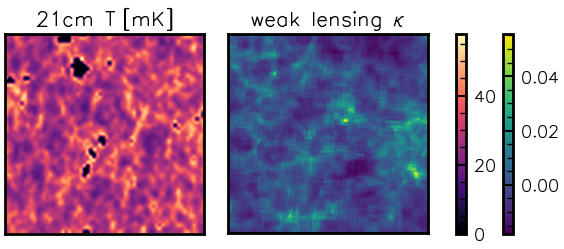

In [277]:
import mpl_toolkits.axes_grid1


fig,axs = plt.subplots(nrows=1, ncols=2, figsize=(7.058 * (2./3.) , 3.41), sharey=False, sharex=False)

img_21cm = np.load("/Users/lucas/repositories/epe_hybrid/img_test.npy")
im1a = axs[0].imshow(img_21cm[1662], cmap="magma", interpolation='spline36')
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_title(r"21cm $T\ [mK]$")
#plt.xlabel(r"$x$")
#plt.ylabel(r"$y$")

img_wl = np.load("/Users/lucas/repositories/epe_hybrid/target_L_250_N_128_Nz_512.npz")["kappa"][1]
im2a = plt.imshow(img_wl, interpolation='spline36')
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_title("weak lensing $\kappa$")
#plt.xlabel(r"$x$")
#plt.ylabel(r"$y$")

fig.tight_layout()

# get bounding box information for the axes (since they're in a line, you only care about the top and bottom)
bbox_ax = axs[0].get_position()

# fig.add_axes() adds the colorbar axes
# they're bounded by [x0, y0, x_width, y_width]
cbar_im1a_ax = fig.add_axes([1.01, bbox_ax.y0, 0.02, bbox_ax.y1-bbox_ax.y0])
cbar_im1a = plt.colorbar(im1a, cax=cbar_im1a_ax)

cbar_im2a_ax = fig.add_axes([1.11, bbox_ax.y0, 0.02, bbox_ax.y1-bbox_ax.y0])
cbar_im1a = plt.colorbar(im2a, cax=cbar_im2a_ax)
plt.savefig("/Users/lucas/repositories/epe_hybrid/plots/pretty_pics.pdf", dpi=500)

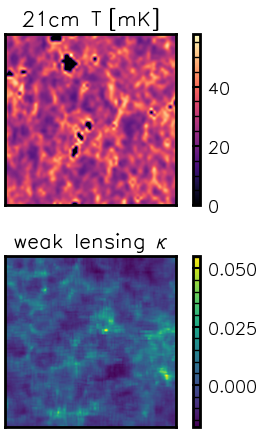

In [286]:
import mpl_toolkits.axes_grid1


fig,axs = plt.subplots(nrows=2, ncols=1, figsize=(3.41, 7.058 * (2./3.)), sharey=False, sharex=False)

img_21cm = np.load("/Users/lucas/repositories/epe_hybrid/img_test.npy")
im1a = axs[0].imshow(img_21cm[1662], cmap="magma", interpolation='spline36')
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_title(r"21cm $T\ [mK]$")
#plt.xlabel(r"$x$")
#plt.ylabel(r"$y$")

img_wl = np.load("/Users/lucas/repositories/epe_hybrid/target_L_250_N_128_Nz_512.npz")["kappa"][1]
im2a = plt.imshow(img_wl, interpolation='spline36')
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_title("weak lensing $\kappa$")
#plt.xlabel(r"$x$")
#plt.ylabel(r"$y$")

fig.tight_layout()

# get bounding box information for the axes (since they're in a line, you only care about the top and bottom)
bbox_ax = axs[0].get_position()
bbox_ax1 = axs[1].get_position()

# fig.add_axes() adds the colorbar axes
# they're bounded by [x0, y0, x_width, y_width]
cbar_im1a_ax = fig.add_axes([0.8, bbox_ax.y0, 0.02, bbox_ax.y1-bbox_ax.y0])
cbar_im1a = plt.colorbar(im1a, cax=cbar_im1a_ax)

cbar_im2a_ax = fig.add_axes([0.8, bbox_ax1.y0, 0.02, bbox_ax.y1-bbox_ax.y0])
cbar_im1a = plt.colorbar(im2a, cax=cbar_im2a_ax)
#plt.tight_layout()
plt.savefig("/Users/lucas/repositories/epe_hybrid/plots/pretty_pics.pdf", dpi=500)


Text(0, 0.5, '$y$')

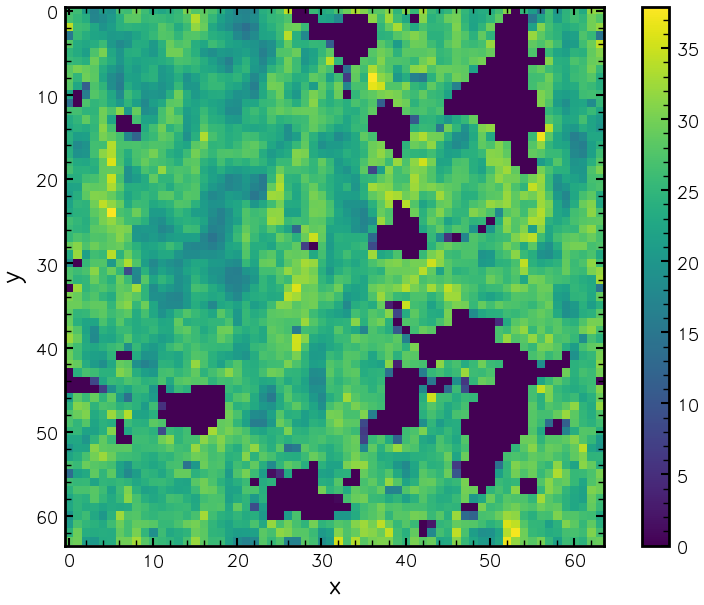

In [239]:
fig,axs = plt.subplots(nrows=1, ncols=1, figsize=(3.41 / 1.25, 3.41 / 1.25), sharey=False, sharex=False)

img_21cm = np.load("/Users/lucas/repositories/epe_hybrid/img_test.npy")
plt.imshow(img_21cm[100])
plt.colorbar()
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

# now do the 21cm simulations

In [174]:
epe_21cm = np.load("hybrid_epe_pos_1853.npy")
ce_21cm = np.load("hybrid_ce_pos_1853.npy")
ps_21cm = np.load("ps_only_pos_1853.npy")

theta_true_21cm = np.array([1.7383707, 4.8372 ])

Parameter $\log T_{\rm vir}$ in chain power spectrum is not constrained


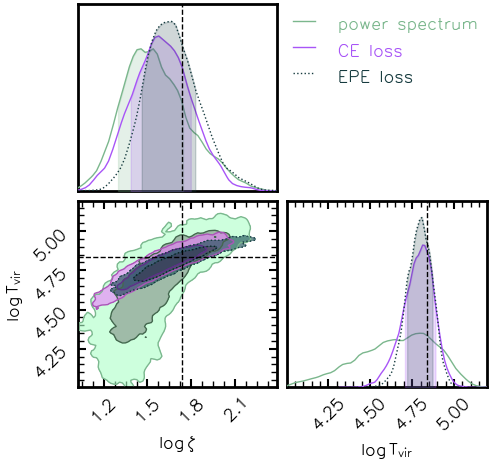

In [175]:
from chainconsumer import Chain, ChainConsumer, make_sample, Truth, PlotConfig, ChainConfig
import pandas as pd

param_labels = [r"$\log \zeta$", r"$\log T_{\rm vir}$"]

df_ce = pd.DataFrame(ce_21cm, columns=param_labels)
df_epe = pd.DataFrame(epe_21cm, columns=param_labels)
df_ps = pd.DataFrame(ps_21cm, columns=param_labels)


c = ChainConsumer()
c.add_chain(Chain(samples = df_ps, name="power spectrum", smooth=1, 
                  shade_alpha=0.6, 
                  linestyle='-',
                  color='#7bb78d',
                  #color='#9ccba3'
                 ))

c.add_chain(Chain(samples = df_ce, name="CE loss", smooth=1, 
                  color="purple",
                 ))

c.add_chain(Chain(samples = df_epe, name="EPE loss", smooth=1, 
                  shade_alpha=0.65,
                  linestyle=':',
                  #color='#64a67f'
                  color='#163b3f'
                  
                 ))

c.add_truth(Truth(location={param_labels[0]: theta_true_21cm[0], param_labels[1]: theta_true_21cm[1]}))

c.set_override(ChainConfig(sigmas=[0, 1, 2]))
c.set_plot_config(PlotConfig(
                label_font_size=16,
                tick_font_size=16,
                #flip=True,
            ))


#plt.rcParams.update({'font.size': 16})
fig = c.plotter.plot(figsize=0.55)
    #figsize="COLUMN")

plt.savefig("/Users/lucas/repositories/epe_hybrid/plots/21cm_results.pdf", dpi=500)

#print(c.analysis.get_latex_table())